### This code takes the data tests done in the data_analysis code and try to predict the income we could get with the prediction

In [1]:
#importing required libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
#%matplotlib inline 
import matplotlib.pyplot as plt

Get the data and we create a new dataframe

In [2]:
#we get the data prepared in the NBA_logistic_regression file
data_test = pd.read_csv("NBA_test0.csv")

#We create a new dataframe
data_test = data_test[['New Date','Visitor','PTSV','Home','PTSH','Probability Visitor','Probability Home','Bet Visitor','Bet Home','Winner']]

Ara buscarem els intervals de predicció donada per la logistic regression en els que surt més a compte apostar. Primer de tot dividirem les apostes en intervals de probabilitat i en si l'equip guanyador és el de casa o és el de fora de casa.

Primer de tot dividim en intervals de 10% de probabilitat de victoria del local.

In [3]:

def bets_incomes_home(data,dim,int1,int2):
    home_prob=[]
    mult=[]
    chosen_bet=[]
    t_or_f=[]

    for i in range(dim):
        if  int1>=data['Probability Home'][i]>int2:
            home_prob=np.append(home_prob,data['Probability Home'][i])
            mult=np.append(mult,data['Bet Home'][i]*data['Probability Home'][i])
            chosen_bet=np.append(chosen_bet,data['Bet Home'][i])
            if data['Winner'][i]==1:
                t_or_f=np.append(t_or_f,1)
            if data['Winner'][i]==0:
                t_or_f=np.append(t_or_f,0)

    return mult, t_or_f,chosen_bet,home_prob

def weekly_bets_home(int1,int2):
    income=[]
    num_bet=[]
    guanys=0
    encerts=0
    len_mult=0
    #18 equals 1230/68 data test shape
    for i in range(50):
        suma=0
        suma_ok=0

        data_test = pd.read_csv('NBA_test'+str(i)+'.csv')

        mult,true_or_false,chosen_bet,home_prob=bets_incomes_home(data_test,len(data_test),int1,int2)
        print(len(mult))
        cash=[]
        for j in range(len(mult)):
            cash=np.append(cash,true_or_false[j]*chosen_bet[j])

        for e in cash:
            suma=suma+float(e)
        income=np.append(income,suma)
    

        for e in true_or_false:
            suma_ok=suma_ok+int(e)

        guanys=guanys+suma
        encerts=encerts+suma_ok
        print('NUM TEST:',i)
        print('guanys:', guanys/float(i+1))
        print('encerts:',encerts/float(i+1))
        st_dev=np.std(income)
        print('st_dev:',st_dev)
        len_mult=len_mult+len(mult)
        #calculation standard deviation
        print('num apostes:',len_mult/(i+1))
        print("\a")
        num_bet=np.append(num_bet,len(mult))
    return income,num_bet,encerts/float(i+1),len_mult/(i+1),guanys/float(i+1)



In [4]:
int1=1
int2=0.9
perc_correct=[]
win_money=[]
inter=[]
while int2>0.5:
    inter=np.append(inter,str(int1)+'-'+str(int2))
    print(int1,int2)
    income,num_bet,correct,nbets,money_won=weekly_bets_home(int1,int2)
    int1=int1-0.1
    int2=int2-0.1
    perc_correct=np.append(perc_correct,correct/float(nbets))
    win_money=np.append(win_money,money_won/float(nbets))
#print(correct)
#print(nbets)
#print(money_won)
intervals_home=pd.DataFrame()
intervals_home['Interval']=inter
intervals_home['%Correct']=perc_correct
intervals_home['%Guanys']=win_money
intervals_home

1 0.9
3
NUM TEST: 0
guanys: 3.21
encerts: 3.0
st_dev: 0.0
num apostes: 3.0

0
NUM TEST: 1
guanys: 1.605
encerts: 1.5
st_dev: 1.605
num apostes: 1.5

2
NUM TEST: 2
guanys: 1.79
encerts: 1.6666666666666667
st_dev: 1.3363382805263044
num apostes: 1.6666666666666667

2
NUM TEST: 3
guanys: 1.8725
encerts: 1.75
st_dev: 1.1660912271344812
num apostes: 1.75

2
NUM TEST: 4
guanys: 1.9120000000000001
encerts: 1.8
st_dev: 1.0459713189184492
num apostes: 1.8

2
NUM TEST: 5
guanys: 1.7666666666666668
encerts: 1.6666666666666667
st_dev: 1.0086239250693105
num apostes: 1.8333333333333333

3
NUM TEST: 6
guanys: 1.975714285714286
encerts: 1.8571428571428572
st_dev: 1.0649863465638172
num apostes: 2.0

6
NUM TEST: 7
guanys: 2.4037500000000005
encerts: 2.25
st_dev: 1.5082849324646854
num apostes: 2.5

0
NUM TEST: 8
guanys: 2.136666666666667
encerts: 2.0
st_dev: 1.6102242769944262
num apostes: 2.2222222222222223

1
NUM TEST: 9
guanys: 2.027
encerts: 1.9
st_dev: 1.562619915398495
num apostes: 2.1


5
NUM TEST: 45
guanys: 5.5630434782608695
encerts: 4.891304347826087
st_dev: 1.9512346922388906
num apostes: 6.434782608695652

7
NUM TEST: 46
guanys: 5.590212765957447
encerts: 4.914893617021277
st_dev: 1.9391405086216564
num apostes: 6.446808510638298

4
NUM TEST: 47
guanys: 5.568333333333334
encerts: 4.895833333333333
st_dev: 1.9246886472593143
num apostes: 6.395833333333333

8
NUM TEST: 48
guanys: 5.5508163265306125
encerts: 4.877551020408164
st_dev: 1.9088096907894752
num apostes: 6.428571428571429

7
NUM TEST: 49
guanys: 5.5738
encerts: 4.9
st_dev: 1.8964618530305324
num apostes: 6.44

0.8 0.7000000000000001
7
NUM TEST: 0
guanys: 8.729999999999999
encerts: 7.0
st_dev: 0.0
num apostes: 7.0

5
NUM TEST: 1
guanys: 6.779999999999999
encerts: 5.5
st_dev: 1.9499999999999997
num apostes: 6.0

8
NUM TEST: 2
guanys: 6.976666666666667
encerts: 5.666666666666667
st_dev: 1.6162783038683515
num apostes: 6.666666666666667

6
NUM TEST: 3
guanys: 7.0175
encerts: 5.75
st_dev: 1.4015237243

17
NUM TEST: 31
guanys: 10.160312500000003
encerts: 7.21875
st_dev: 2.7651825034423587
num apostes: 11.375

12
NUM TEST: 32
guanys: 10.183030303030307
encerts: 7.242424242424242
st_dev: 2.7259943805367777
num apostes: 11.393939393939394

8
NUM TEST: 33
guanys: 10.175000000000004
encerts: 7.235294117647059
st_dev: 2.686003208355142
num apostes: 11.294117647058824

6
NUM TEST: 34
guanys: 10.048000000000005
encerts: 7.142857142857143
st_dev: 2.7489757053439794
num apostes: 11.142857142857142

13
NUM TEST: 35
guanys: 10.240555555555561
encerts: 7.277777777777778
st_dev: 2.940182292576474
num apostes: 11.194444444444445

7
NUM TEST: 36
guanys: 10.074864864864871
encerts: 7.162162162162162
st_dev: 3.0658367065889576
num apostes: 11.08108108108108

13
NUM TEST: 37
guanys: 10.059736842105268
encerts: 7.157894736842105
st_dev: 3.0266269977285774
num apostes: 11.131578947368421

9
NUM TEST: 38
guanys: 9.983589743589748
encerts: 7.102564102564102
st_dev: 3.024223135828344
num apostes: 11.0

,Interval,%Correct,%Guanys
0,1-0.9,0.917431,0.980734
1,0.9-0.8,0.760870,0.865497
2,0.8-0.7000000000000001,0.776204,0.960028
3,0.7000000000000001-0.6000000000000001,0.659381,0.926412
4,0.6000000000000001-0.5000000000000001,0.594771,0.981405


Podem veure que no val la pena apostar en cap dels intervals dels partits en que es preveu un 50% o més de possibilitats de victoria del local

In [5]:
intervals_home

,Interval,%Correct,%Guanys
0,1-0.9,0.917431,0.980734
1,0.9-0.8,0.760870,0.865497
2,0.8-0.7000000000000001,0.776204,0.960028
3,0.7000000000000001-0.6000000000000001,0.659381,0.926412
4,0.6000000000000001-0.5000000000000001,0.594771,0.981405


Segon dividim en intervals de 10% de probabilitat de victoria del visitant.

In [6]:

def bets_incomes_visitor(data,dim,int1,int2):
    home_prob=[]
    mult=[]
    chosen_bet=[]
    t_or_f=[]

    for i in range(dim):

        if int1>=data['Probability Visitor'][i]>int2:
            home_prob=np.append(home_prob,data['Probability Visitor'][i])
            mult=np.append(mult,data['Bet Visitor'][i]*data['Probability Visitor'][i])
            chosen_bet=np.append(chosen_bet,data['Bet Visitor'][i])
            if data['Winner'][i]==1:
                t_or_f=np.append(t_or_f,0)
            if data['Winner'][i]==0:
                t_or_f=np.append(t_or_f,1)

    return mult, t_or_f,chosen_bet,home_prob

def weekly_bets_visitor(int1,int2):
    income=[]
    num_bet=[]
    guanys=0
    encerts=0
    len_mult=0
    #18 equals 1230/68 data test shape
    for i in range(50):
        suma=0
        suma_ok=0

        data_test = pd.read_csv('NBA_test'+str(i)+'.csv')

        mult,true_or_false,chosen_bet,home_prob=bets_incomes_visitor(data_test,len(data_test),int1,int2)
        print(len(mult))
        cash=[]
        for j in range(len(mult)):
            cash=np.append(cash,true_or_false[j]*chosen_bet[j])

        for e in cash:
            suma=suma+float(e)
        income=np.append(income,suma)
    

        for e in true_or_false:
            suma_ok=suma_ok+int(e)

        guanys=guanys+suma
        encerts=encerts+suma_ok
        print('NUM TEST:',i)
        print('guanys:', guanys/float(i+1))
        print('encerts:',encerts/float(i+1))
        st_dev=np.std(income)
        print('st_dev:',st_dev)
        len_mult=len_mult+len(mult)
        #calculation standard deviation
        print('num apostes:',len_mult/(i+1))
        print("\a")
        num_bet=np.append(num_bet,len(mult))
    return income,num_bet,encerts/float(i+1),len_mult/(i+1),guanys/float(i+1)

In [7]:
int1=1
int2=0.9
perc_correct=[]
win_money=[]
inter=[]
while int2>0.5:
    inter=np.append(inter,str(int1)+'-'+str(int2))
    print(int1,int2)
    income,num_bet,correct,nbets,money_won=weekly_bets_visitor(int1,int2)
    int1=int1-0.1
    int2=int2-0.1
    perc_correct=np.append(perc_correct,correct/float(nbets))
    win_money=np.append(win_money,money_won/float(nbets))
#print(correct)
#print(nbets)
#print(money_won)
intervals_visit=pd.DataFrame()
intervals_visit['Interval']=inter
intervals_visit['%Correct']=perc_correct
intervals_visit['%Guanys']=win_money
intervals_visit

1 0.9
0
NUM TEST: 0
guanys: 0.0
encerts: 0.0
st_dev: 0.0
num apostes: 0.0

0
NUM TEST: 1
guanys: 0.0
encerts: 0.0
st_dev: 0.0
num apostes: 0.0

0
NUM TEST: 2
guanys: 0.0
encerts: 0.0
st_dev: 0.0
num apostes: 0.0

0
NUM TEST: 3
guanys: 0.0
encerts: 0.0
st_dev: 0.0
num apostes: 0.0

0
NUM TEST: 4
guanys: 0.0
encerts: 0.0
st_dev: 0.0
num apostes: 0.0

0
NUM TEST: 5
guanys: 0.0
encerts: 0.0
st_dev: 0.0
num apostes: 0.0

0
NUM TEST: 6
guanys: 0.0
encerts: 0.0
st_dev: 0.0
num apostes: 0.0

0
NUM TEST: 7
guanys: 0.0
encerts: 0.0
st_dev: 0.0
num apostes: 0.0

0
NUM TEST: 8
guanys: 0.0
encerts: 0.0
st_dev: 0.0
num apostes: 0.0

0
NUM TEST: 9
guanys: 0.0
encerts: 0.0
st_dev: 0.0
num apostes: 0.0

1
NUM TEST: 10
guanys: 0.09818181818181819
encerts: 0.09090909090909091
st_dev: 0.31047817027107727
num apostes: 0.09090909090909091

0
NUM TEST: 11
guanys: 0.09000000000000001
encerts: 0.08333333333333333
st_dev: 0.29849623113198603
num apostes: 0.08333333333333333

0
NUM TEST: 12
guanys: 0

1
NUM TEST: 25
guanys: 1.3930769230769227
encerts: 1.1923076923076923
st_dev: 1.3077454740323406
num apostes: 1.6923076923076923

1
NUM TEST: 26
guanys: 1.3848148148148145
encerts: 1.1851851851851851
st_dev: 1.2839907994662012
num apostes: 1.6666666666666667

2
NUM TEST: 27
guanys: 1.4232142857142855
encerts: 1.2142857142857142
st_dev: 1.2765440330702842
num apostes: 1.6785714285714286

0
NUM TEST: 28
guanys: 1.3741379310344826
encerts: 1.1724137931034482
st_dev: 1.2809412413275054
num apostes: 1.6206896551724137

3
NUM TEST: 29
guanys: 1.4023333333333332
encerts: 1.2
st_dev: 1.2685311278097287
num apostes: 1.6666666666666667

1
NUM TEST: 30
guanys: 1.3948387096774193
encerts: 1.1935483870967742
st_dev: 1.248578213261225
num apostes: 1.6451612903225807

2
NUM TEST: 31
guanys: 1.4206249999999998
encerts: 1.21875
st_dev: 1.237272548541751
num apostes: 1.65625

0
NUM TEST: 32
guanys: 1.3775757575757575
encerts: 1.1818181818181819
st_dev: 1.2424804865318027
num apostes: 1.6060606060

8
NUM TEST: 19
guanys: 8.3635
encerts: 5.6
st_dev: 3.5030062446418784
num apostes: 8.65

5
NUM TEST: 20
guanys: 8.15904761904762
encerts: 5.476190476190476
st_dev: 3.5387472961916697
num apostes: 8.476190476190476

4
NUM TEST: 21
guanys: 7.941363636363636
encerts: 5.318181818181818
st_dev: 3.5984204810830103
num apostes: 8.272727272727273

4
NUM TEST: 22
guanys: 7.656086956521739
encerts: 5.130434782608695
st_dev: 3.7651118571413504
num apostes: 8.08695652173913

6
NUM TEST: 23
guanys: 7.618333333333333
encerts: 5.083333333333333
st_dev: 3.6902819073284303
num apostes: 8.0

8
NUM TEST: 24
guanys: 7.7476
encerts: 5.16
st_dev: 3.670761534068918
num apostes: 8.0

4
NUM TEST: 25
guanys: 7.608461538461539
encerts: 5.076923076923077
st_dev: 3.6660917067589653
num apostes: 7.846153846153846

10
NUM TEST: 26
guanys: 7.839629629629629
encerts: 5.222222222222222
st_dev: 3.7857427291053383
num apostes: 7.925925925925926

7
NUM TEST: 27
guanys: 7.774285714285713
encerts: 5.178571428571429


,Interval,%Correct,%Guanys
0,1-0.9,1.000000,1.088000
1,0.9-0.8,0.705882,0.822353
2,0.8-0.7000000000000001,0.759197,1.010134
3,0.7000000000000001-0.6000000000000001,0.668367,1.003189
4,0.6000000000000001-0.5000000000000001,0.617602,1.152838


Aquí val la pena apostar entre el 80 i el 50% de possibilitats pel visitant

In [8]:
intervals_visit

,Interval,%Correct,%Guanys
0,1-0.9,1.000000,1.088000
1,0.9-0.8,0.705882,0.822353
2,0.8-0.7000000000000001,0.759197,1.010134
3,0.7000000000000001-0.6000000000000001,0.668367,1.003189
4,0.6000000000000001-0.5000000000000001,0.617602,1.152838


This function gives us the incomes for every test we do and also we peform the methodology of betting only taking the type of bets that gives us good results. This function calculates the money we could get for every simulation and we choose also how is going to be our way to bet

In [9]:
#this function calculates the money we could get for every simulation and we choose also how is going to be our way to bet
def bets_incomes(data,dim):
    home_prob=[]
    mult=[]
    chosen_bet=[]
    t_or_f=[]

    for i in range(dim):
        #if data['Probability Home'][i]>0.89 or 0.7>=data['Probability Home'][i]>0.6: model antic

        if 0.8>=data['Probability Visitor'][i]>0.5:
            home_prob=np.append(home_prob,data['Probability Visitor'][i])
            mult=np.append(mult,data['Bet Visitor'][i]*data['Probability Visitor'][i])
            chosen_bet=np.append(chosen_bet,data['Bet Visitor'][i])
            if data['Winner'][i]==1:
                t_or_f=np.append(t_or_f,0)
            if data['Winner'][i]==0:
                t_or_f=np.append(t_or_f,1)




    return mult, t_or_f,chosen_bet,home_prob

This function calculates the money we are going to get in average the std deviation the max min income for every simulation the number of bets we are going to do in every simulation etc.

In [10]:
def weekly_bets(year):
    income=[]
    num_bet=[]
    guanys=0
    encerts=0
    len_mult=0
    #18 equals 1230/68 data test shape
    for i in range(18):
        suma=0
        suma_ok=0

        data_test = pd.read_csv('NBA_test'+str(i+year)+'.csv')

        mult,true_or_false,chosen_bet,home_prob=bets_incomes(data_test,len(data_test))
        print(len(mult))
        cash=[]
        for j in range(len(mult)):
            cash=np.append(cash,true_or_false[j]*chosen_bet[j])

        for e in cash:
            suma=suma+float(e)
        income=np.append(income,suma)
    

        for e in true_or_false:
            suma_ok=suma_ok+int(e)

        guanys=guanys+suma
        encerts=encerts+suma_ok
        print('NUM TEST:',i)
        print('guanys:', guanys/float(i+1))
        print('encerts:',encerts/float(i+1))
        st_dev=np.std(income)
        print('st_dev:',st_dev)
        len_mult=len_mult+len(mult)
        #calculation standard deviation
        print('num apostes:',len_mult/(i+1))
        print("\a")
        num_bet=np.append(num_bet,len(mult))
    return income,num_bet
   


In [11]:
income,num_bet=weekly_bets(18*1)

35
NUM TEST: 0
guanys: 37.35
encerts: 24.0
st_dev: 0.0
num apostes: 35.0

25
NUM TEST: 1
guanys: 30.22
encerts: 19.0
st_dev: 7.130000000000001
num apostes: 30.0

24
NUM TEST: 2
guanys: 27.95
encerts: 17.333333333333332
st_dev: 6.6480874442704705
num apostes: 28.0

22
NUM TEST: 3
guanys: 27.099999999999998
encerts: 16.5
st_dev: 5.942667751103035
num apostes: 26.5

26
NUM TEST: 4
guanys: 26.744
encerts: 16.6
st_dev: 5.362758991414774
num apostes: 26.4

30
NUM TEST: 5
guanys: 26.94333333333333
encerts: 16.666666666666668
st_dev: 4.915755847838211
num apostes: 27.0

23
NUM TEST: 6
guanys: 26.204285714285714
encerts: 16.285714285714285
st_dev: 4.897929175078141
num apostes: 26.428571428571427

22
NUM TEST: 7
guanys: 26.07
encerts: 16.125
st_dev: 4.595348191377886
num apostes: 25.875

35
NUM TEST: 8
guanys: 27.903333333333332
encerts: 17.22222222222222
st_dev: 6.75720027493307
num apostes: 26.88888888888889

29
NUM TEST: 9
guanys: 27.71
encerts: 17.2
st_dev: 6.436627999193367
num ap

This function gets the incomes in every year of betting

In [12]:
def acumulation(income,num_bet,c,col):
    for i in range(len(income)):
        gains=float(income[i])/float(num_bet[i])
        c=c*gains
        col=np.append(col,c)

    return c,col

mon,collect=acumulation(income,num_bet,300,[300])
print(mon,'€')

901.365781722924 €


Money evolution of every week during a year using the model of betting

In [13]:
collection=pd.DataFrame()
collection['Weekly collect']=collect
collection

,Weekly collect
0,300.000000
1,320.142857
2,295.683943
3,288.415046
4,321.844972
5,313.427488
6,291.905467
7,276.294870
8,315.604095
9,383.864752


Text(0, 0.5, 'Collection (€)')

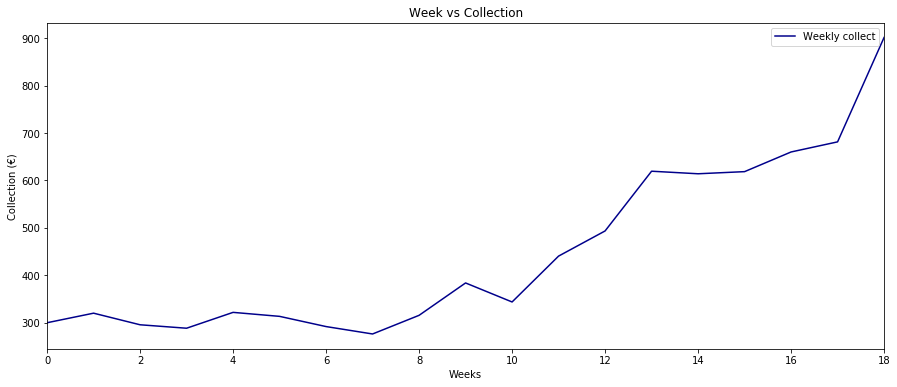

In [14]:
collection.plot(kind='line', y='Weekly collect', figsize=(15,6), color='darkblue')

plt.title('Week vs Collection')
plt.xlabel('Weeks')
plt.ylabel('Collection (€)')


Now we will make the simulation for 10 years betting like that

In [15]:
years_money=[]
mon=300
for k in range(7):
    income,num_bet=weekly_bets(18*k)
    mon,collect=acumulation(income,num_bet,mon,[mon])
    years_money=np.append(years_money,mon)


28
NUM TEST: 0
guanys: 26.48
encerts: 16.0
st_dev: 0.0
num apostes: 28.0

26
NUM TEST: 1
guanys: 27.380000000000003
encerts: 16.5
st_dev: 0.9000000000000004
num apostes: 27.0

27
NUM TEST: 2
guanys: 29.076666666666668
encerts: 18.0
st_dev: 2.509453238367982
num apostes: 27.0

30
NUM TEST: 3
guanys: 32.01
encerts: 19.5
st_dev: 5.525970502997639
num apostes: 27.75

30
NUM TEST: 4
guanys: 31.9
encerts: 19.6
st_dev: 4.947472081780753
num apostes: 28.2

25
NUM TEST: 5
guanys: 30.406666666666666
encerts: 18.666666666666668
st_dev: 5.616771512374543
num apostes: 27.666666666666668

23
NUM TEST: 6
guanys: 29.86285714285714
encerts: 18.285714285714285
st_dev: 5.368018294320843
num apostes: 27.0

22
NUM TEST: 7
guanys: 29.3325
encerts: 17.875
st_dev: 5.21369530659397
num apostes: 26.375

25
NUM TEST: 8
guanys: 29.060000000000002
encerts: 17.77777777777778
st_dev: 4.975578135028909
num apostes: 26.22222222222222

31
NUM TEST: 9
guanys: 29.228
encerts: 17.9
st_dev: 4.747078680620324
num a

30
NUM TEST: 11
guanys: 26.64666666666666
encerts: 16.416666666666668
st_dev: 5.600912624048174
num apostes: 25.083333333333332

28
NUM TEST: 12
guanys: 26.616923076923072
encerts: 16.307692307692307
st_dev: 5.382169114650543
num apostes: 25.307692307692307

22
NUM TEST: 13
guanys: 25.95928571428571
encerts: 15.928571428571429
st_dev: 5.702714221298127
num apostes: 25.071428571428573

27
NUM TEST: 14
guanys: 25.995999999999995
encerts: 16.0
st_dev: 5.5110577327164085
num apostes: 25.2

23
NUM TEST: 15
guanys: 26.208124999999995
encerts: 16.0625
st_dev: 5.398933018141176
num apostes: 25.0625

28
NUM TEST: 16
guanys: 26.129999999999995
encerts: 16.0
st_dev: 5.247048470050454
num apostes: 25.235294117647058

26
NUM TEST: 17
guanys: 26.353888888888886
encerts: 16.11111111111111
st_dev: 5.182097536378797
num apostes: 25.27777777777778

27
NUM TEST: 0
guanys: 31.279999999999994
encerts: 19.0
st_dev: 0.0
num apostes: 27.0

25
NUM TEST: 1
guanys: 28.604999999999997
encerts: 17.5
st_dev

In [16]:
year_money=pd.DataFrame()
year_money['Money end of the year']=years_money
#year_money['Money end of the year']=np.array([range(10)])
year_money


,Money end of the year
0,963.873291
1,2896.008008
2,13033.594193
3,14147.283443
4,26172.575257
5,75844.527750
6,146455.025063


Text(0, 0.5, 'Money end of the year (€)')

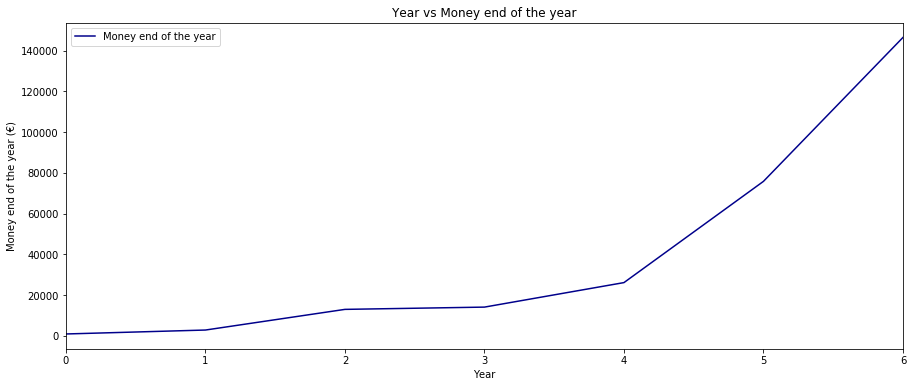

In [17]:
year_money.plot(kind='line', y='Money end of the year', figsize=(15,6), color='darkblue')

plt.title('Year vs Money end of the year')
plt.xlabel('Year')
plt.ylabel('Money end of the year (€)')
